<a href="https://colab.research.google.com/github/LEESOOJAE1978/sjcu/blob/main/lecture09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 구글 드라이브 연결하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = "/content/drive/My Drive/sjcu/porto-seguro-safe-driver-prediction/"

1. 패키지 불러오기

In [3]:
import pandas as pd
import numpy as np
import missingno as msno

2. 데이터 불러오기(Indexing 확인)

In [4]:
train = pd.read_csv(data_path + "train.csv", index_col = 'id')
test = pd.read_csv(data_path + "test.csv", index_col = 'id')
submission = pd.read_csv(data_path + "sample_submission.csv", index_col = 'id')

In [5]:
train1 = pd.read_csv(data_path + "train.csv")

In [6]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
train1.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [8]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [9]:
submission.head() #타깃값 1= 운전자가 보험금을 청구할 확률 구하는 문제

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

3. 결측치 확인 및 대체

In [30]:
len(train.loc[train['ps_car_03_cat'] ==-1])

411231

In [34]:
train_copy = train.copy().replace(-1, np.NaN)

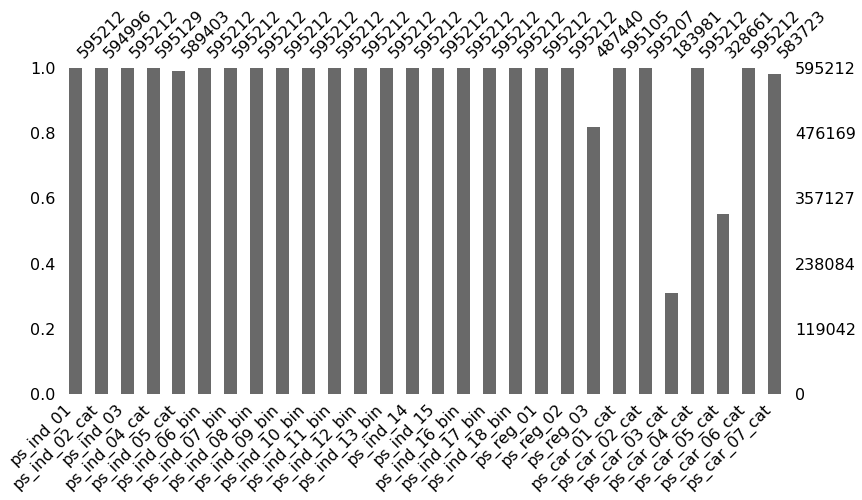

In [35]:
msno.bar(df = train_copy.iloc[:,1:29], figsize = (13, 6))

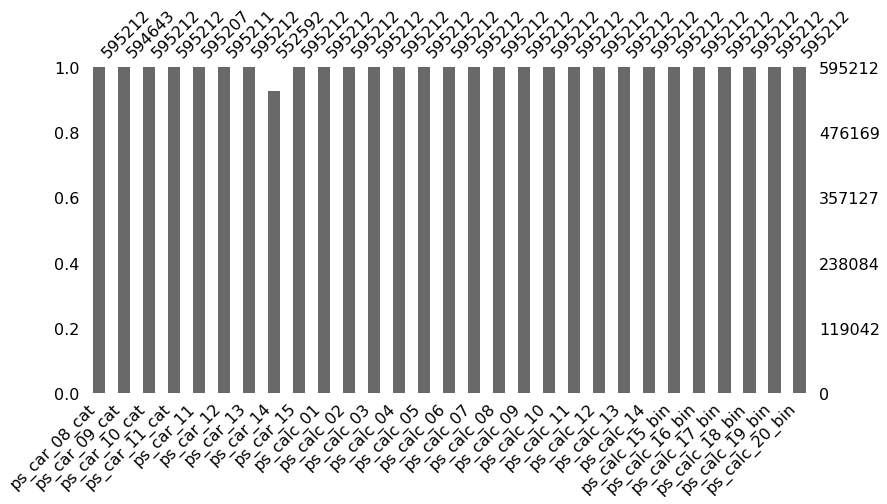

In [37]:
msno.bar(df = train_copy.iloc[:, 29:], figsize = (13,6))

4. 함수 만들기- 피처 요약표

In [40]:
def resumetable(df):
  print(f'데이터셋 형상:{df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary['결측값 개수'] = (df == -1).sum().values
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류'] = None
  for col in df.columns:
    if 'bin' in col or col == 'target':
      summary.loc[col, '데이터 종류'] = '이진형'
    elif 'cat' in col:
      summary.loc[col, '데이터 종류'] = '명목형'
    elif df[col].dtype == float:
      summary.loc[col, '데이터 종류'] = '연속형'
    elif df[col].dtype == int:
      summary.loc[col, '데이터 종류'] = '순서형'
  
  return summary

In [41]:
summary = resumetable(train)
summary

데이터셋 형상:(595212, 58)


,데이터 타입,결측값 개수,고유값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


5. 시각화

In [42]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

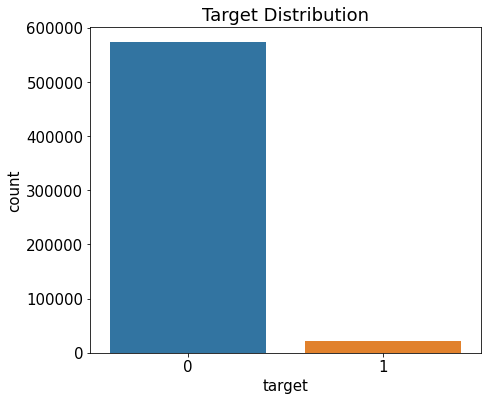

In [43]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7,6))

ax = sns.countplot( x = 'target', data = train)
ax.set_title('Target Distribution')

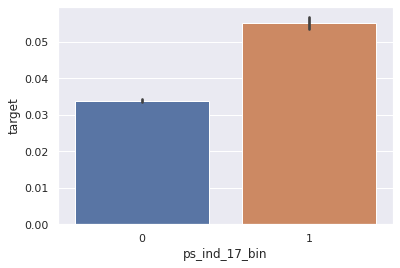

In [54]:
sns.barplot(x = 'ps_ind_17_bin', y= 'target', data = train)

In [ ]:
sns.barplot(x = 'ps_calc_19_bin', y= 'target', data = train)

In [57]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size = (12,18)):
  mpl.rc('font', size = 9)
  plt.figure(figsize = size)
  grid = gridspec.GridSpec(num_rows, num_cols)
  plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.barplot(x = feature, y = 'target', data = df, palette = 'Set2', ax = ax)

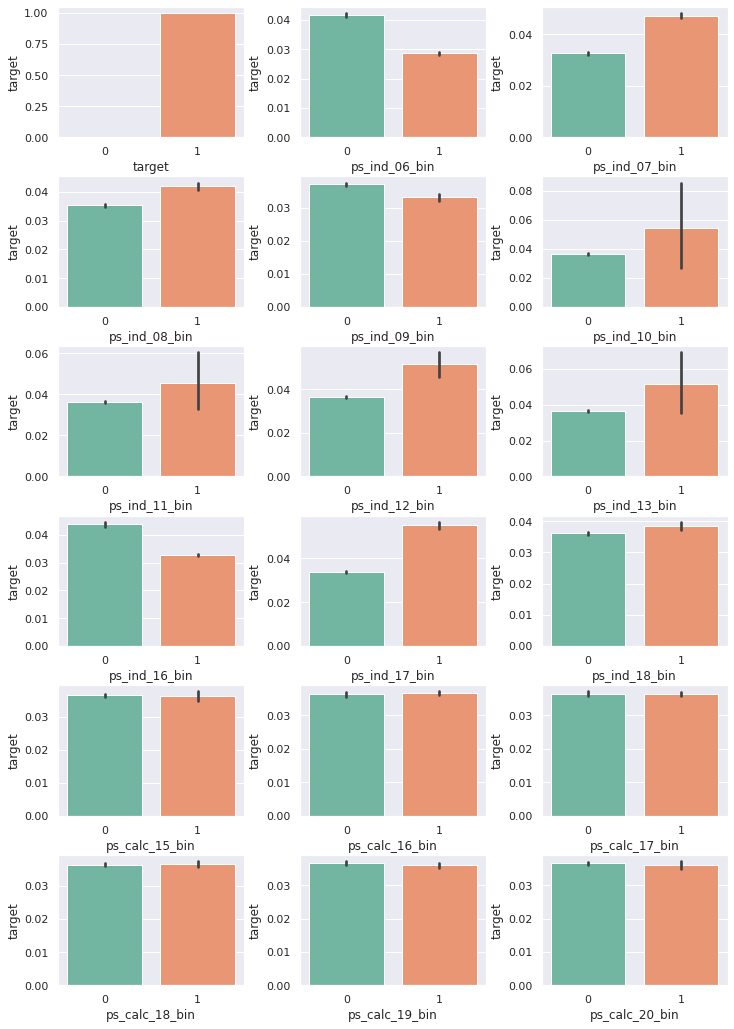

In [58]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

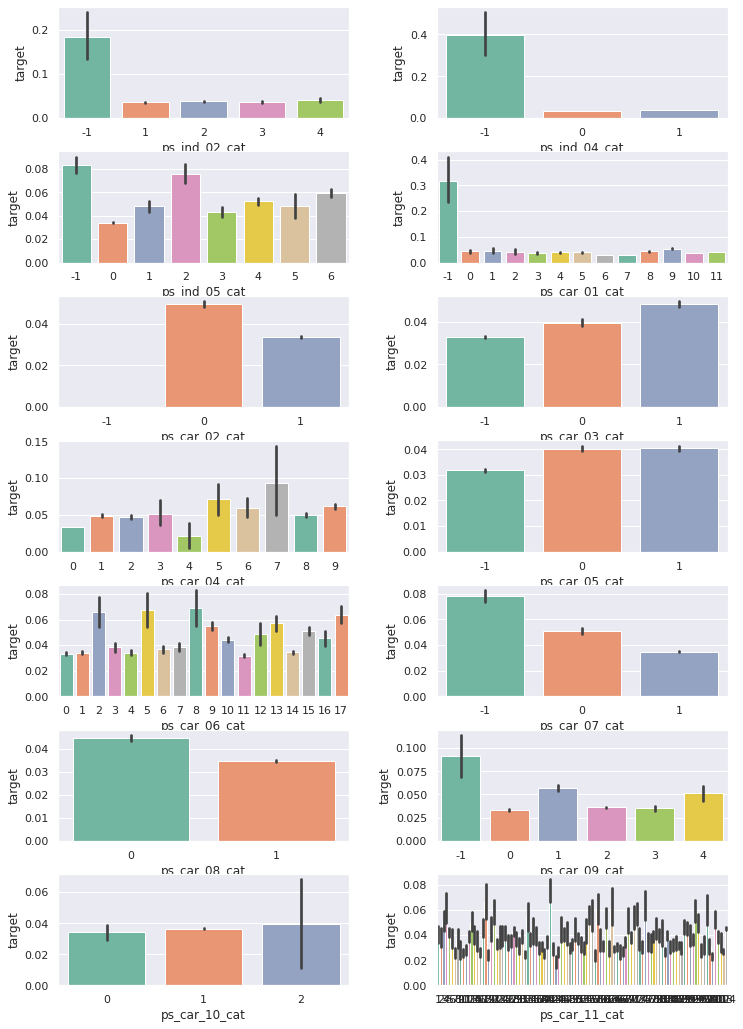

In [72]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index
plot_target_ratio_by_features(train, nom_features, 7, 2)

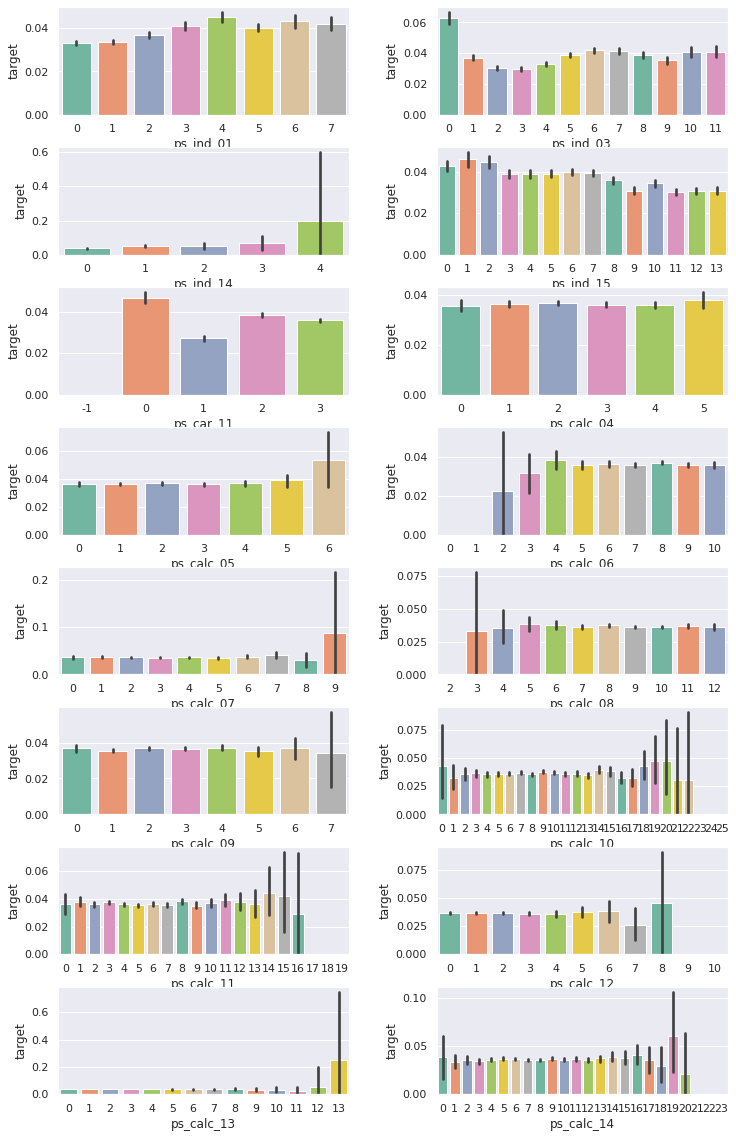

In [73]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index
plot_target_ratio_by_features(train, ord_features, 8, 2, (12,20))

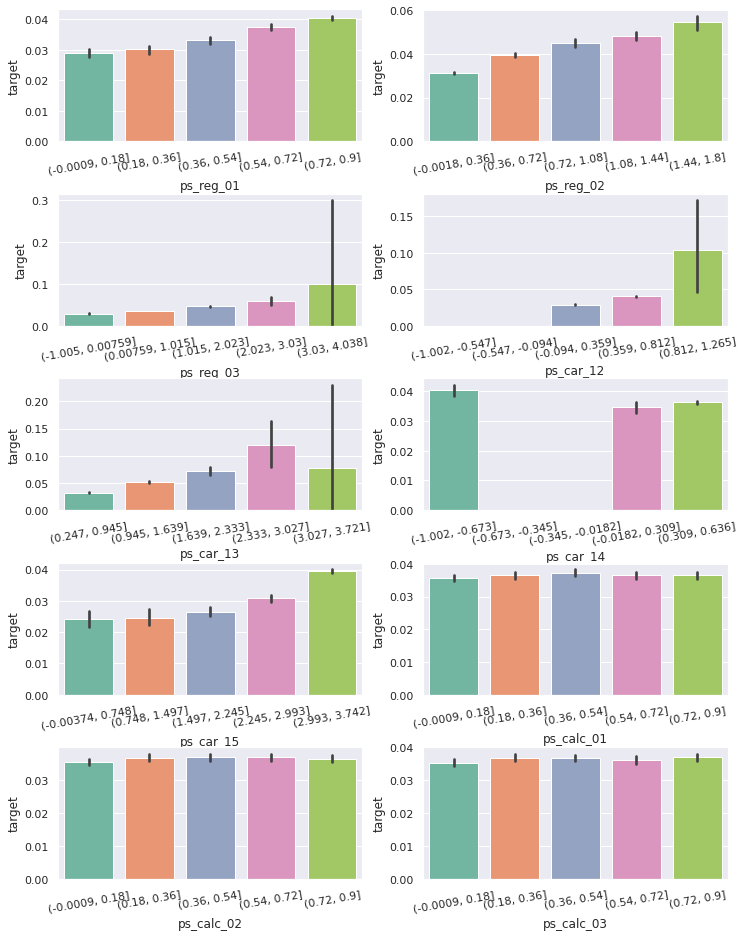

In [74]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index
plt.figure(figsize = (12,16))
grid = gridspec.GridSpec(5,2)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

for idx, cont_feature in enumerate(cont_features):
  train[cont_feature] = pd.cut(train[cont_feature], 5)

  ax = plt.subplot(grid[idx])
  sns.barplot(x = cont_feature, y = 'target', data = train, palette = 'Set2', ax = ax)
  ax.tick_params(axis ='x', labelrotation = 10)

In [76]:
plt.figure(figsize = (10,8))
cont_corr = train[cont_features].corr()
#sns.heatmap(cont_corr, annot = True, cmap ='OrRd')

<Figure size 720x576 with 0 Axes>

In [78]:
train_copy = train_copy.dropna()

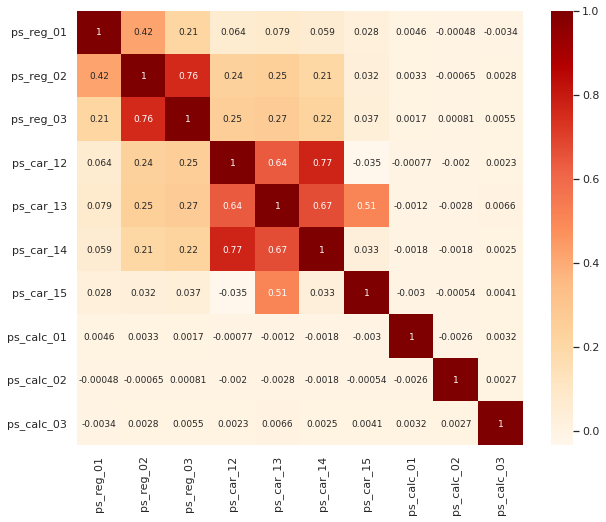

In [79]:
plt.figure(figsize = (10,8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot = True, cmap ='OrRd')